Little test of the idea of exponential weighting, using a sine function. (Aug 2022)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def weighted_avg_sin_fn(dt, run_duration, tau, dy=0.0):
    """Evaluate a function over time, and at each step calculate
    an exponentially-weighted running average of past values.
    Here y is the function (a sine wave with an optional offset),
    and yavg is the running weighted average over past values.
    The "tau" parameter represents the time scale for averaging.
    The "dt" parameter is the time interval size, and it scales
    the strength of weighting of the most recent value of y 
    relative to past values. The amplitude and period of the sine 
    function are both unity.
    """
    nsteps = int(run_duration / dt)
    y = np.zeros(nsteps + 1)  # the function value
    yavg = np.zeros(nsteps + 1)  # the weighted past avg of the fn
    for i in range(1, nsteps + 1):
        y[i] = np.sin(np.pi * i * dt) + dy  # evaluate the fn
        weight = 1.0 - np.exp(-dt / tau)  # weight factor
        yavg[i] = weight * y[i] + (1.0 - weight) * yavg[i-1]
    t = np.arange(0, run_duration + dt, dt)
    plt.plot(t, y, 'r', label='function')
    plt.plot(t, yavg, 'b', label='weighted past avg')
    plt.xlabel('Time')
    plt.ylabel('Function value')
    plt.legend()
    return y, yavg, t

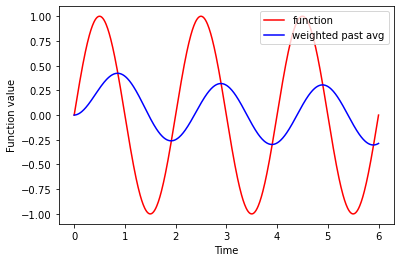

In [3]:
# When tau equals wave period, the past-average is lagged and
# dampened
y, yavg, t = weighted_avg_sin_fn(0.01, 6.0, 1.0)

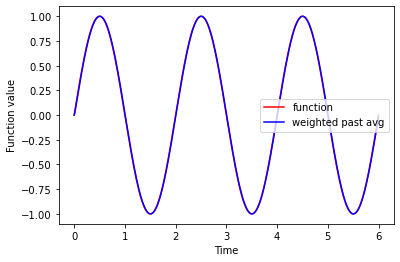

In [4]:
# When tau is small, the function and its weighted past average
# are nearly identical
y, yavg, t = weighted_avg_sin_fn(0.01, 6.0, 0.01)

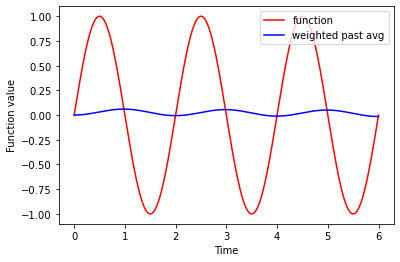

In [5]:
# When tau is greater than the period, the weighted-past-average
# is highly damped/smoothed, and lagged
y, yavg, t = weighted_avg_sin_fn(0.01, 6.0, 10.0)

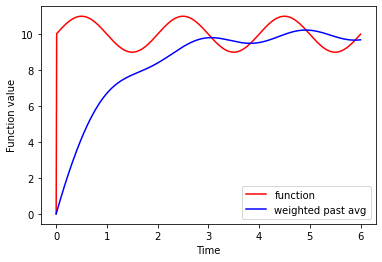

In [6]:
# if the function is very different from an initial value,
# the weighted-past-average "remembers" it for a while
y, yavg, t = weighted_avg_sin_fn(0.01, 6.0, 1.0, dy=10.0)